<b>Machine Learning Exercise session: 11th SEPTEMBER 2025</b>

# <b>Working with: CROSS-VALIDATION AND REGULARISATION</b>

Welcome to this week's exercise session. Today, we will learn about CROSS VALIDATION AND REGULARISATION OF MODELS. This notebook will take you through 
- Validation set and cross-validation
- Model selection between regression models with many features
- Regularisation of regression models

The exercises are structured in 3 sections. 

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. Ensure that you are working within the virtual environment (venv) with conda activate ml. where ml is the name of the venv, and/or selecting it on VSCode/Jupyter.
- Solving these exercises are supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, read documentation if needed. <b>We are happy to help if you are stuck.</b>
- None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!
- Do not hesitate in reaching out to the TAs for any issue you might encounter while solving them
- Remember to provide a Feedback on this Exercise sheet on the LearnIT page of the course so we can make an even better exercise session!

Have fun! 

# <b>Exploring theoretical background</b>

### Exercise t1

Open questions

1) Why do we need cross-validation? Compare LOOCV and k-fold cross-validation. What are the main advantages and disadvantages of each?
2) After performing 2-fold, 5-fold, and 10-fold CV on the same dataset, you notice that as k increases, your estimated test error decreases slightly, but the results vary more between runs. Why? What happens with the bias and variance of the estimated test error? 
3) You split your dataset into 5 folds without shuffling. It turns out your data is ordered by time. What problem might occur, and how could you fix it?
4) You compare two nested models (Model A and Model B) using cross-validation. Model A has 10 predictors, Model B has 15 predictors. Cross-validation shows almost identical MSEs. Which model should you choose?
5) Explain in words (and maybe a sketch) how the penalty in ridge regression affects the estimated coefficients compared to lasso regression.


In [260]:
# Your solution here...

"""
# We need cross validation, to better estimate the error for the test and decrease variance and bias, aka reduce overfit. The advantage of loocv is we
run throug the whole dataset, but for every CV its a comppletely different test and training, but this take times! Instead do k-fold as we decrease
the time it takes and still have different test and training for every k-fold. 

2) More folds gives smaller validation set and larger training set. It will produce more variance in the estimate for the error, but the bias decrease.
As we have more training data to train on and less to test on, the model because more overfit to the reality of society.

3)It might give us an overfit, as the data is ordered and it might not actually recgonize the patterns, if we dont shuffle the data.
Shuffle the data randomly before CV.

4)Choose the more simpler model :) This model is easier to interpret, than the more complex model. The model with more predictors might have
lower bias, but is harder to understand, even though they have same MSE.

5)
The ridge regression will continue to decrease the importance of the predictors by reducing them close to 0, while lasso completely eliminates them.
Use ridge when we want to reduce the impact of the less important predictors, without removing them.
Use lasso when you want a sparse model and try to only use the most important predictors.
"""

'\n# We need cross validation, to better estimate the error for the test and decrease variance and bias, aka reduce overfit. The advantage of loocv is we\nrun throug the whole dataset, but for every CV its a comppletely different test and training, but this take times! Instead do k-fold as we decrease\nthe time it takes and still have different test and training for every k-fold. \n\n2) More folds gives smaller validation set and larger training set. It will produce more variance in the estimate for the error, but the bias decrease.\nAs we have more training data to train on and less to test on, the model because more overfit to the reality of society.\n\n3)It might give us an overfit, as the data is ordered and it might not actually recgonize the patterns, if we dont shuffle the data.\nShuffle the data randomly before CV.\n\n4)Choose the more simpler model :) This model is easier to interpret, than the more complex model. The model with more predictors might have\nlower bias, but is h

### Exercise t2

Indicate whether each statement is true or false, and explain your reasoning:

1) The importance of feature in ridge or lasso regression depends on the scale of the features.
2) In k-fold cross-validation, the result is always identical across different runs if we keep the same value of k. 
3) Two nested models can be compared using cross-validation or an F-test.

In [261]:
# Your solution here...
"""

1) True. Scaling matters because some important features might be scaled different to less important features.

2) False if we keep shuffling the data before doing the k-fold. If we dont shuffle every time, they its true.

3) True: We can use both tests. For the F-test we do a inferential significance test.


"""

'\n\n1) True. Scaling matters because some important features might be scaled different to less important features.\n\n2) False if we keep shuffling the data before doing the k-fold. If we dont shuffle every time, they its true.\n\n3) True: We can use both tests. For the F-test we do a inferential significance test.\n\n\n'

### Exercise t3
1. The Lasso regression, relative to least squares, is:  

    a) More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.  
    b) More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.  
    c) Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.  
    d) Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.  

2. Repeat for Ridge regression relative to least squares.

In [262]:
# Your solution here...
"""
Because Lasso decreases the variables to close to zero, it decreases the flexibility of the model, meaning it decreases variance and increases bias
So c)

For ridge
"""

'\nBecause Lasso decreases the variables to close to zero, it decreases the flexibility of the model, meaning it decreases variance and increases bias\nSo c)\n\nFor ridge\n'

# <b>Applying what you learned</b>

### Documentation

- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- random: https://docs.python.org/3/library/random.html
- sklearn : https://sklearn.org/stable/getting_started.html
    - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
    - linear_model : https://sklearn.org/stable/api/sklearn.linear_model.html
    - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
    - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html
    - preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html



In [263]:
# You might need to import even more to solve the exercises !! 

import numpy as np
from pandas import read_csv, DataFrame
from math import log, sqrt
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from scipy.stats import f

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

#### Dataset

On this part of the exercises you will apply the different validation, model selection and regularisation methods learnt today. You will work with the calories dataset, trying to predict the number of calories a person has burnt during a workout based on some biological measures. It has 7 features:
- Gender
- Age
- Height
- Weight
- Duration
- Heart rate
- Body temperature

In [264]:
data = read_csv("calories.csv")
print('Number of observations: ', len(data))
data.head()
data.drop("id", axis=1)

Number of observations:  200


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
195,male,40,194.0,94.0,3.0,86.0,38.9,13.0
196,female,52,158.0,58.0,11.0,90.0,40.1,55.0
197,female,28,163.0,66.0,13.0,94.0,40.2,62.0
198,male,21,176.0,78.0,25.0,102.0,40.8,125.0


### Exercise a1

To find the model that can best predict the calories burned, we will choose the one that performs best on unseen data. To estimate this unknown performance, we use a validation set.

A first approach:

1) Split the data into two random subsets, each containing half of the observations. Set a random seed of 30 to ensure reproducibility.

2) Use one subset as the training set to fit a Linear Regression model that predicts calories burned based on heart rate.

3) Use the other subset as the validation set to compute the MSE. Compare it with the training MSE.

4) Repeat the process using a random seed of 50. Do you obtain the same results?

In [265]:
## Your solution here...
data = pd.get_dummies(data, columns = ["Sex"], dtype="int")
train_set = data.sample(frac = 0.5, random_state=30)
valid_set = data.drop(train_set.index)
model = LinearRegression()
y = "Calories"
X= ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Sex_female","Sex_male"]
model.fit(train_set[X],train_set[y])
y_model1_pred = model.predict(valid_set[X])
mse_model1 = mean_squared_error(valid_set[y], y_model1_pred)
mse_model1

262.35964729347984

In [277]:
data = read_csv("calories.csv")
data = pd.get_dummies(data, columns = ["Sex"], dtype="int")
data.drop("id", axis=1)
train_set = data.sample(frac = 0.5, random_state=50)
valid_set = data.drop(train_set.index)
model = LinearRegression()
y = "Calories"
X= ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp"]
model.fit(train_set[X],train_set[y])
y_model2_pred = model.predict(valid_set[X])
mse_model2 = mean_squared_error(valid_set[y], y_model2_pred)
mse_model2


135.44038153445734

In [267]:
"""
def LOOCV(df):
    df = df.drop("id", axis=1)
    df = pd.get_dummies(df, columns=["Sex"])
    MSE_list = []
    for i in range(len(df)):
        # Define the training data and the validation with just one observation
        train = df.drop(i)
        valid = df.iloc[i]

        # Define x and y to train the model
        x = train.drop(labels="Calories", axis=1)
        y = train["Calories"]

        reg = LinearRegression().fit(x,y)
        print(valid)
        # Define the values for x and y to validate on
        #x_valid = valid.drop(labels="Calories", axis = 1)
        y_valid = valid["Calories"]


        #y_pred = reg.predict(x_valid)

        #MSE = mean_squared_error(y_valid, y_pred)
        #MSE_list.append(MSE)
    avg_MSE = MSE_list.mean()
    print("The average MSE is : ", avg_MSE)

LOOCV(data)
"""

'\ndef LOOCV(df):\n    df = df.drop("id", axis=1)\n    df = pd.get_dummies(df, columns=["Sex"])\n    MSE_list = []\n    for i in range(len(df)):\n        # Define the training data and the validation with just one observation\n        train = df.drop(i)\n        valid = df.iloc[i]\n\n        # Define x and y to train the model\n        x = train.drop(labels="Calories", axis=1)\n        y = train["Calories"]\n\n        reg = LinearRegression().fit(x,y)\n        print(valid)\n        # Define the values for x and y to validate on\n        #x_valid = valid.drop(labels="Calories", axis = 1)\n        y_valid = valid["Calories"]\n\n\n        #y_pred = reg.predict(x_valid)\n\n        #MSE = mean_squared_error(y_valid, y_pred)\n        #MSE_list.append(MSE)\n    avg_MSE = MSE_list.mean()\n    print("The average MSE is : ", avg_MSE)\n\nLOOCV(data)\n'

### Exercise a2

This time, we want to implement **Leave-One-Out Cross-Validation (LOOCV)** to estimate the test MSE.

1. Write a function that iterates over the \(n\) observations. For each iteration:
   - Leave out the \(i\)-th observation.
   - Fit a Linear Regression model on the remaining \(n-1\) observations.
   - Use the fitted model to predict the calories for the left-out observation.
2. Compute and report the final MSE over all observations.
3. Compare this MSE with the one obtained using the previous validation set approach. How do they differ?


In [268]:
# Your solution here...
loo = LeaveOneOut()
model = LinearRegression()
features= data[X]
target = data[y]


def loocv_model(features,target):
    y_true =[]
    y_pred = []
    for train_index, test_index in loo.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        
        y_true.append(y_test.values[0])
        y_pred.append(y_hat[0])
    mse = mean_squared_error(y_true, y_pred)
    return mse
mse = loocv_model(features,target)
print("LOOCV MSE:", mse)


LOOCV MSE: 179.31568842189182


### Exercise a3

Now, implement **k-fold cross-validation** with \(k\) values of 5, 8, and 10. 

1. Write a function similar to the LOOCV function from the previous exercise, but this time:
   - Split the dataset into \(k\) folds.
   - For each fold, fit a Linear Regression model on the remaining \(k-1\) folds.
   - Use the fitted model to predict the calories for the observations in the left-out fold.
2. Compute and report the estimated MSE for each value of \(k\) (5, 8, and 10).  
3. Based on the results, which number of folds would you choose and why?

In [269]:
# Your solution here...

def kfoldmodel(features,target, splits):
    y_pred = []
    y_true = []
    model = LinearRegression()
    kf = KFold(n_splits=splits, shuffle=True,random_state=42)
    for i, (train_index, test_index) in enumerate(kf.split(features)):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)   
        y_true.extend(y_test.values)
        y_pred.extend(y_hat)     
    mse = mean_squared_error(y_true, y_pred)
    return mse
folds = [5,8,10]
mses = []
count = 0
for i in folds:
    mse = kfoldmodel(features,target,i)
    mses.append(mse)
    print(f"fold {i} = {mse}")
    count+=1

fold 5 = 177.62297771601007
fold 8 = 179.14359116003703
fold 10 = 175.5738862712059


### Exercise a4
We can increase the complexity of our model by increasing the degree of the polynomial.  

1. For polynomial degrees from 1 to 8, apply 8-fold cross-validation to estimate the test MSE and its standard error for each degree.  
2. Based on your results, what do you expect will happen to the training and test MSE as the polynomial degree increases?  
3. Plot the resulting MSE curve against the polynomial degree.
4. Choose the optimal degree using the One-Standard-Error (1-SE) rule. 

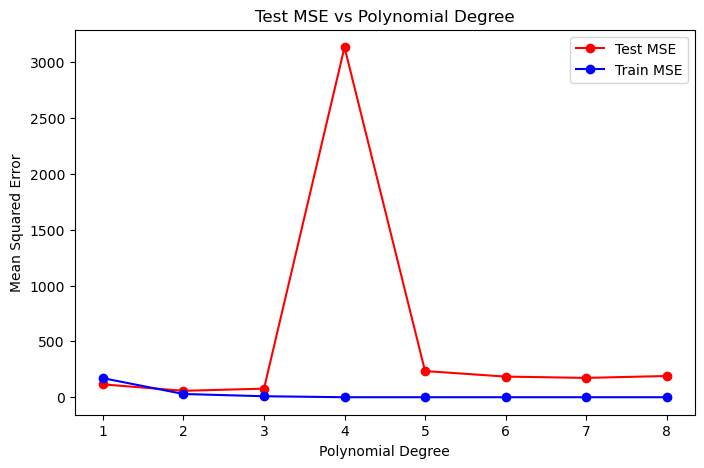

In [270]:
# Your solution here...
from sklearn.preprocessing import PolynomialFeatures
degrees = range(1,9)
X = features.values
y = target.values
kf = KFold(n_splits=8,shuffle=True,random_state=42)
results={}
ses = []
for deg in degrees:
    fold_mse = []
    poly = PolynomialFeatures(degree = deg, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()

    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train,y_train)
        y_hat = model.predict(X_test)
        y_hat_train = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test,y_hat)
        fold_mse.append(test_mse)
    mean_mse = np.mean(fold_mse)
    se_mse = np.std(fold_mse, ddof=1) / np.sqrt(len(fold_mse))
    ses.append(se_mse)
    results[deg]={"test_MSE": test_mse, "train_MSE": train_mse, "test_SE": se_mse}


test_mses = [results[d]["test_MSE"] for d in degrees]
train_mses =[results[d]["train_MSE"] for d in degrees]
plt.figure(figsize=(8,5))
plt.plot(degrees,test_mses,marker='o',label="Test MSE", color="red")
plt.plot(degrees, train_mses, marker="o",label="Train MSE", color="blue")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Test MSE vs Polynomial Degree")
plt.xticks(degrees)
plt.legend()
plt.show()

In [271]:
test_mses = np.array([results[d]["test_MSE"] for d in degrees])
test_ses = np.array([results[d]["test_SE"] for d in degrees])
min_idx = np.argmin(test_mses)
min_mse = test_mses[min_idx]
min_se = ses[min_idx]

threshold = min_mse + min_se

optimal_degree = degrees[0]  # default
for d, mse in zip(degrees, test_mses):
    if mse <= threshold:
        optimal_degree = d
        break
print(optimal_degree)

2


## Exercise a5 

There are other variables in our dataset that can be used as features for our regression model.  

1. Train three different Linear Regression models using the following features:  
   - Model 1: Heart rate and duration  
   - Model 2: Heart rate, duration, and body temperature
   - Model 3: Heart rate, height, and weight  
2. How could you compare the performance of these models?  
3. Based on your comparison, which model would you choose, and why?


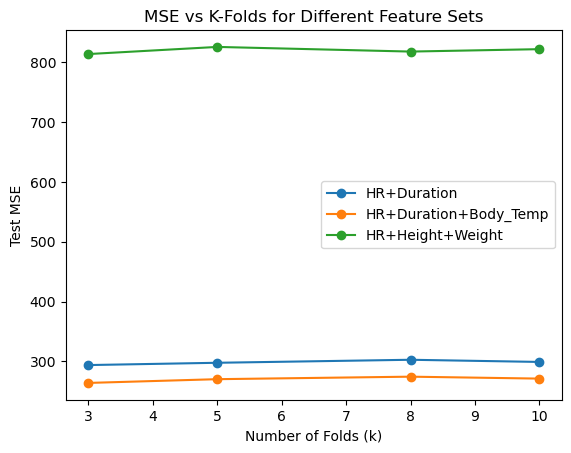

In [272]:
# Your solution here... 
X1 = data[["Heart_Rate","Duration"]]
X2 = data[["Heart_Rate", "Duration", "Body_Temp"]]
X3 = data[["Heart_Rate", "Height", "Weight"]]
features_list = [X1,X2,X3]
features_names = ["HR+Duration", "HR+Duration+Body_Temp", "HR+Height+Weight"]
mse_list = {}
count = 0
splits = [3,5,8,10]
for n in splits:
    mse_list[n]={}
    for d, name in zip(features_list,features_names):
        mse = kfoldmodel(d,target,n)
        mse_list[n][name] = mse

for name in features_names:
    mses = [mse_list[n][name] for n in splits]

    plt.plot(splits, mses, marker='o', label=name)

plt.xlabel("Number of Folds (k)")
plt.ylabel("Test MSE")
plt.title("MSE vs K-Folds for Different Feature Sets")
plt.legend()
plt.show()

### OPTIONAL

Implement forward or backward stepwise selection algorithm from last week's Linear Regression exercises to select the optimal features for our linear regression model, considering all 7 possible features.

In [273]:
# Your solution here...

### Exercise a6

Another strategy for models with many features is applying shrinkage methods, which can improve model fit by reducing the variance of the coefficients. For this exercise, we will fit a model including all 7 variables in the dataset.  

The Lasso estimates for coefficients $\beta$ in a linear regression model are found by minimising $RSS + \lambda\sum_{j=1}^p|\beta_j|$ rather than RSS. 


In Ridge regression, we estimate $\beta$ by minimising $RSS + \lambda\sum_{j=1}^p\beta_j^2$ rather than RSS.

1. Randomly split the data, leaving aside 25% as a test set to evaluate model performance.  
2. Using the training set, fit three models using all features:  
   - OLS (simple linear regression)  
   - Ridge regression ($\lambda$ = 10)  
   - Lasso regression ($\lambda$ = 10)  
    
!! Important: Standardize the features before fitting Ridge and Lasso models.  
4. Report the coefficients, training MSE, and test MSE for each model.


In [278]:
# Your solution here..
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
y = "Calories"
X= ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Sex_female","Sex_male"]
X_train, X_test, y_train, y_test = train_test_split(data[X],data[y],test_size = 0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
#y_train_scaled  = scaler.fit_transform(y_train)
X_test_scaled = scaler.transform(X_test)
#y_test_scaled = scaler.transform(y_test)
model_linear = LinearRegression()
model_ridge = Ridge(alpha = 10)
model_lasso = Lasso(alpha= 10) #Ted Lasso

model_linear.fit(X_train,y_train)
model_ridge.fit(X_train_scaled,y_train)
model_lasso.fit(X_train_scaled,y_train)

y_linear_pred = model_linear.predict(X_test)
y_ridge_pred = model_ridge.predict(X_test_scaled)
y_lasso_pred = model_lasso.predict(X_test_scaled)

test_linear_mse = mean_squared_error(y_test,y_linear_pred)
train_linear_mse = mean_squared_error(y_train,model_linear.predict(X_train))

test_ridge_mse = mean_squared_error(y_test,y_ridge_pred)
train_ridge_mse = mean_squared_error(y_train, model_ridge.predict(X_train_scaled))

test_lasso_mse = mean_squared_error(y_test,y_lasso_pred)
train_lasso_mse = mean_squared_error(y_train, model_lasso.predict(X_train_scaled))


betas_linear = [model_linear.coef_,model_linear.intercept_]
betas_ridge = [model_ridge.coef_,model_ridge.intercept_]
betas_lasso = [model_lasso.coef_,model_lasso.intercept_]

print("Linear values", "\nTrain MSE: " ,train_linear_mse,"\nTest_MSE: ", test_linear_mse, "\nCoefficents: ", model_linear.coef_, "\nIntercept: ", model_linear.intercept_)
print("Ridge values", "\nTrain MSE: " ,train_ridge_mse,"\nTest_MSE: ", test_ridge_mse, "\nCoefficents: ", betas_ridge[0], "\nIntercept: ", betas_ridge[1])
print("Lasso Values", "\nTrain MSE: " ,train_lasso_mse,"\nTest_MSE: ", test_lasso_mse, "\nCoefficents: ", betas_lasso[0], "\nIntercept: ", betas_lasso[1])


Linear values 
Train MSE:  142.4263994287812 
Test_MSE:  212.60426328833026 
Coefficents:  [  0.61798414  -0.29868286   0.61877847   6.52239558   1.80315721
 -13.02034605   4.07551883  -4.07551883] 
Intercept:  317.54063479700244
Ridge values 
Train MSE:  178.0487684128828 
Test_MSE:  252.7093469116348 
Coefficents:  [ 9.4101304   0.21335167  3.65179344 37.5631024  19.68322512  1.14524334
  1.40372569 -1.40372569] 
Intercept:  90.58
Lasso Values 
Train MSE:  373.2540586384718 
Test_MSE:  507.0481133570867 
Coefficents:  [ 0.07414054  0.          0.         39.48108533 10.28577754  0.
 -0.          0.        ] 
Intercept:  90.58


### Exercise a7

Instead of arbitrarily choosing a regularization parameter $\lambda$, we can find the optimal value via cross-validation.  

1. Using the training dataset, create a further partition to obtain a validation set. Use this to select the best $\lambda$ for both Ridge and Lasso regression. You can choose to perform either LOOCV or k-fold cross-validation.  
3. Plot the MSE for different values of $\lambda$. Which value appears to be optimal?  
4. Can you relate the choice of $\lambda$ to the bias-variance trade-off?

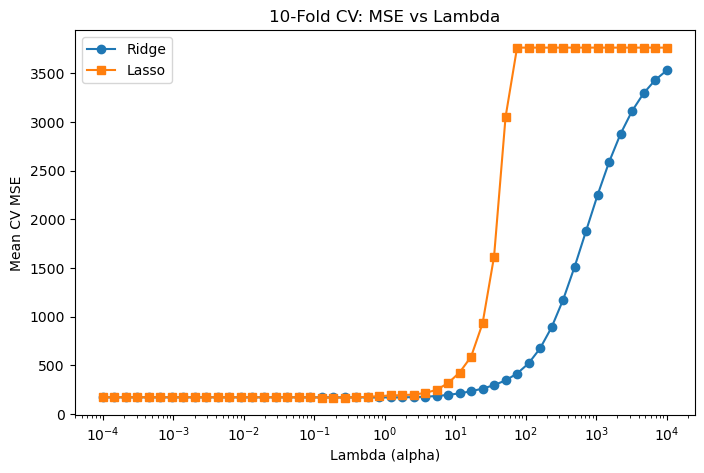

Best Ridge alpha: 0.8286427728546842
Best Lasso alpha: 0.18420699693267145


In [282]:


# Load and preprocess
data = pd.read_csv("calories.csv")
data = pd.get_dummies(data, columns=["Sex"], dtype=int)
data.drop("id", axis=1)

# Define features and target
features = data.drop("Calories", axis=1)
target = data["Calories"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Candidate lambdas
lambdas = np.logspace(-4,4,50)

# K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scaler = StandardScaler()

mses_lam_ridge = []
mses_lam_lasso = []

for l in lambdas:
    ridge_model = Ridge(alpha=l)
    lasso_model = Lasso(alpha=l, max_iter=10000)
    
    mses_fold_ridge = []
    mses_fold_lasso = []
    
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Scale features
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        # Ridge
        ridge_model.fit(X_tr_scaled, y_tr)
        y_pred_ridge = ridge_model.predict(X_val_scaled)
        mses_fold_ridge.append(mean_squared_error(y_val, y_pred_ridge))

        # Lasso
        lasso_model.fit(X_tr_scaled, y_tr)
        y_pred_lasso = lasso_model.predict(X_val_scaled)
        mses_fold_lasso.append(mean_squared_error(y_val, y_pred_lasso))
    
    # Average MSE across folds
    mses_lam_ridge.append(np.mean(mses_fold_ridge))
    mses_lam_lasso.append(np.mean(mses_fold_lasso))

# Plot MSE vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, mses_lam_ridge, marker="o", label="Ridge")
plt.plot(lambdas, mses_lam_lasso, marker="s", label="Lasso")
plt.xscale("log")
plt.xlabel("Lambda (alpha)")
plt.ylabel("Mean CV MSE")
plt.title("10-Fold CV: MSE vs Lambda")
plt.legend()
plt.show()

# Optimal lambdas
best_ridge = lambdas[np.argmin(mses_lam_ridge)]
best_lasso = lambdas[np.argmin(mses_lam_lasso)]
print("Best Ridge alpha:", best_ridge)
print("Best Lasso alpha:", best_lasso)


In [286]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
data = pd.read_csv("calories.csv")
data = pd.get_dummies(data, columns=["Sex"], dtype=int)
data = data.drop("id", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data[X],data[y],test_size = 0.25, random_state=42)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
lambdas = np.logspace(-4,4,50)


X_train_sub = scaler.fit_transform(X_tr)
X_val = scaler.transform(X_val)
mse_ridge = []
#Ridge
ridge_cv = RidgeCV(alphas=lambdas, cv=5)
ridge_cv.fit(X_train_sub, y_train_sub)
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    # Note: scoring='neg_mean_squared_error' → need to take -score
    scores = cross_val_score(ridge, X_train_sub, y_train_sub, 
                             cv=5, scoring='neg_mean_squared_error')
    mse_ridge.append(-scores.mean())
#Lasso
lasso_cv = LassoCV(alphas=lambdas, cv=5, max_iter=10000)
lasso_cv.fit(X_train_sub, y_train_sub)

plt.plot(lambdas, mse_ridge, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Ridge CV MSE')
plt.show()
best_ridge = lambdas[np.argmin(mse_ridge)]
best_ridge


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- id


### Exercise a8

After finding the optimal parameters for both Lasso and Ridge, train the models with the full training set. 

1) Inspect the coefficients of both models. Which features appear to be the most important?  
2. How did the performance of the models change compared to previous steps?  

In [ ]:
# Your solution here...
X= ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Sex_female","Sex_male"]
X_train, X_test, y_train, y_test = train_test_split(data[X],data[y],test_size = 0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridge_model = Ridge(best_ridge)
lasso_model = Lasso(best_lasso)

ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled,y_train)

y_ridge_pred = ridge_model.predict(X_test_scaled)
y_lasso_pred = lasso_model.predict(X_test_scaled)

print("Test MSE Ridge: ", mean_squared_error(y_test, y_ridge_pred))
print("Test MSE Lasso: ", mean_squared_error(y_test, y_lasso_pred))

Test MSE Ridge:  230.01864933740342
Test MSE Lasso:  208.64968943978877


# <b>Exploring what you learned</b>

### Exercise e1

For this exercise, we use the dataset provided in the `e1.csv` file.  

1) Start by investigating the relationship between features and the target variable.  
   - Hint: A pairplot is a great way to visualize these relationships.  
   - Which feature do you think is the most important?  
2) Fit three regression models using all features:  
   - OLS (simple linear regression)  
   - Ridge regression ($\lambda$ = 2) 
   - Lasso regression ($\lambda$ = 2) 
3) Compare the coefficients across the three methods. How do they change? Can any of these methods be used for feature selection?  
4) Explore different values of $\lambda$ to observe the effect on the coefficients.  

LinearRegression()  coef:  [3.0841507  1.91581293 1.05436269]  intercept:  -0.02923955722200694
Ridge(alpha=0.5)  coef:  [2.6532943  2.05760444 1.00080514]  intercept:  -0.172412073246942
Lasso(alpha=0.5)  coef:  [2.31932553 1.80381578 0.53189804]  intercept:  -0.172412073246942
LinearRegression()  coef:  [3.0841507  1.91581293 1.05436269]  intercept:  -0.02923955722200694
Ridge(alpha=0.7)  coef:  [2.64734918 2.05575466 0.99835932]  intercept:  -0.172412073246942
Lasso(alpha=0.7)  coef:  [2.17970223 1.70048762 0.34186386]  intercept:  -0.172412073246942
LinearRegression()  coef:  [3.0841507  1.91581293 1.05436269]  intercept:  -0.02923955722200694
Ridge(alpha=1)  coef:  [2.63850417 2.05295493 0.99471644]  intercept:  -0.172412073246942
Lasso(alpha=1)  coef:  [1.97026727 1.54549538 0.0568126 ]  intercept:  -0.172412073246942
LinearRegression()  coef:  [3.0841507  1.91581293 1.05436269]  intercept:  -0.02923955722200694
Ridge(alpha=2)  coef:  [2.60962906 2.04342205 0.98279196]  intercept

'" \nFrom the pairplot we would expect the Ridge And Lasso regression to reduce the coefficient of X3.\nWe see it has no clear relationship with y and it looks more random, than some clear patterns.\nThis is of course in term of linear.\n'

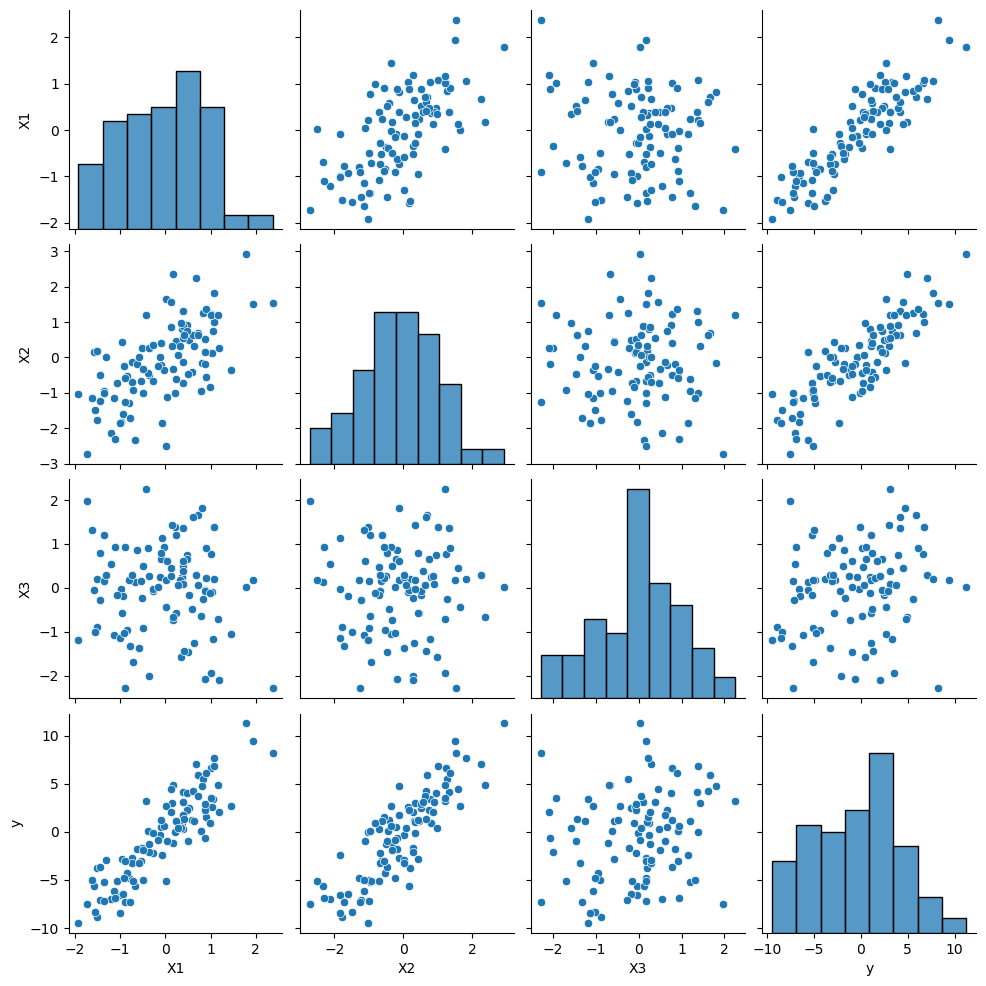

In [ ]:
# Your solution here...
df = pd.read_csv("e1.csv")
features = df.drop("y", axis=1)
target = df["y"]
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
alphas = [0.5,0.7,1,2]
linear_model = LinearRegression()

for l in alphas:
    ridgy_model = Ridge(alpha=l)
    Lassi_model = Lasso(alpha=l)
    linear_model.fit(X_train,y_train)
    ridgy_model.fit(X_train_scaled,y_train)
    Lassi_model.fit(X_train_scaled, y_train)
    models = [linear_model, ridgy_model, Lassi_model]
    for model in models:
        print(model, " coef: ", model.coef_, " intercept: ", model.intercept_)
sns.pairplot(df)
"""" 
From the pairplot we would expect the Ridge And Lasso regression to reduce the coefficient of X3.
We see it has no clear relationship with y and it looks more random, than some clear patterns.
This is of course in term of linear.
"""